
# <span style="color:rgb(213,80,0)">Dealing with tightly packed clusters</span>

The CLASSIX <samp>radius</samp> parameter controls the coarseness of the computed clusters. If it is set higher, then the cluster size tends to grow. When the clusters are not very well separated, it can become difficult to find a <samp>radius</samp> parameter that produces the right number of clusters. Let's demonstrate this with the following example of two tightly packed Gaussian blobs. We start with <samp>radius=0.1</samp>.


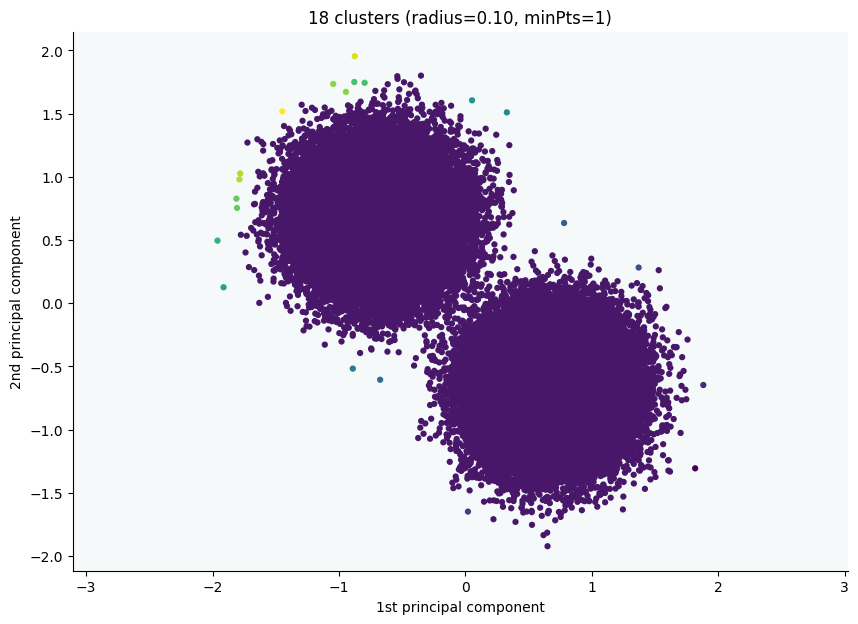

CLASSIX clustered 100000 data points with 2 features. 
The radius parameter was set to 0.10 and minPts was set to 1. 
As the provided data was auto-scaled by a factor of 1/5.24,
points within a radius R=0.10*5.24=0.52 were grouped together. 
In total, 1866180 distances were computed (18.7 per data point). 
This resulted in 616 groups, each with a unique group center. 
These 616 groups were subsequently merged into 18 clusters. 
For a visualisation of the clusters, use .explain(plot=True). 
In order to explain the clustering of individual data points, 
use .explain(ind1) or .explain(ind1, ind2) with data indices.


In [18]:
from classix import CLASSIX
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score as ari
from time import time

# Generate synthetic data
X, y = datasets.make_blobs(n_samples=100000, centers=2, n_features=2, cluster_std=1.5, random_state=42)

# Call CLASSIX
clx = CLASSIX(radius=0.1, minPts=1, verbose=0)
clx.fit(X)
clx.explain(plot=True)


The data points between the two ground truth clusters are so close that even a small <samp>radius</samp> like 0.1 merges them together. Note also that we get many unwanted clusters with a small number of points. We could easily remove them by increasing `minPts`, but the two main clusters would still remain merged. Let's try a smaller radius.


CLASSIX(radius=0.02, minPts=1, group_merging='distance')
CLASSIX aggregated the 100000 data points into 7956 groups. 
In total, 5797989 distances were computed (58.0 per data point). 
The 7956 groups were merged into 715 clusters with sizes: 
      * cluster  0 : 49056
      * cluster  1 : 49010
      * cluster  2 : 36
      * cluster  3 : 33
      * cluster  4 : 29
      * cluster  5 : 26
      * cluster  6 : 22
      * cluster  7 : 21
      * cluster  8 : 18
      * cluster  9 : 15
      * cluster 10 : 15
      * cluster 11 : 14
      * cluster 12 : 13
      * cluster 13 : 13
      * cluster 14 : 13
      * cluster 15 : 13
      * cluster 16 : 12
      * cluster 17 : 12
      * cluster 18 : 11
      * cluster 19 : 11
      ... truncated ...
Try the .explain() method to explain the clustering.


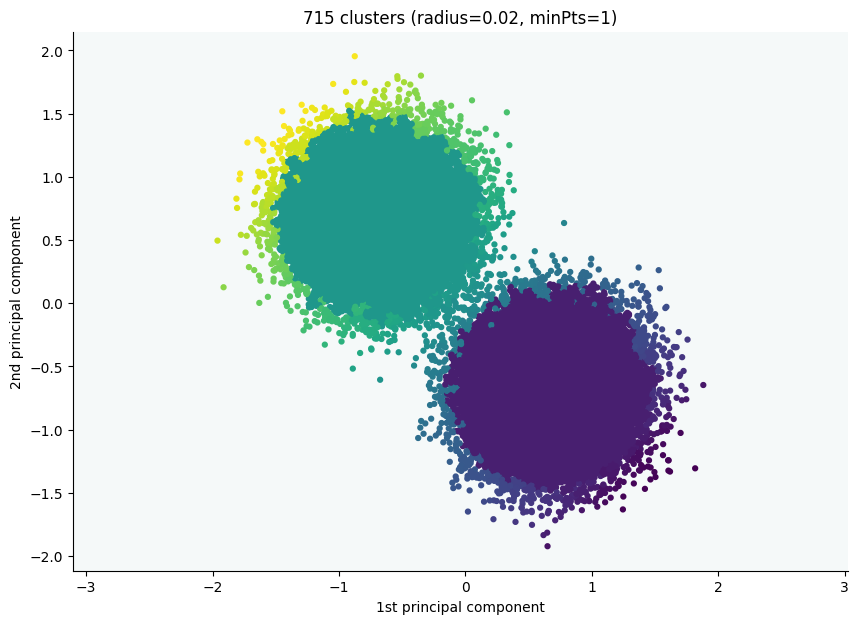

CLASSIX clustered 100000 data points with 2 features. 
The radius parameter was set to 0.02 and minPts was set to 1. 
As the provided data was auto-scaled by a factor of 1/5.24,
points within a radius R=0.02*5.24=0.10 were grouped together. 
In total, 5797989 distances were computed (58.0 per data point). 
This resulted in 7956 groups, each with a unique group center. 
These 7956 groups were subsequently merged into 715 clusters. 
For a visualisation of the clusters, use .explain(plot=True). 
In order to explain the clustering of individual data points, 
use .explain(ind1) or .explain(ind1, ind2) with data indices.


In [19]:
clx = CLASSIX(radius=0.02, minPts=1, verbose=1)
clx.fit(X)
clx.explain(plot=True)

Now the two ground truth clusters are separated but we have a large number of unwanted clusters. We can find out about their cluster sizes looking at the above output of CLASSIX. The largest unwanted cluster contains 36 data points, so if we choose, say, `minPts=50`, we should end up with exactly two clusters:

Runtime in seconds: 1.7196617126464844
Adjusted Rand index: 0.9982407568073931


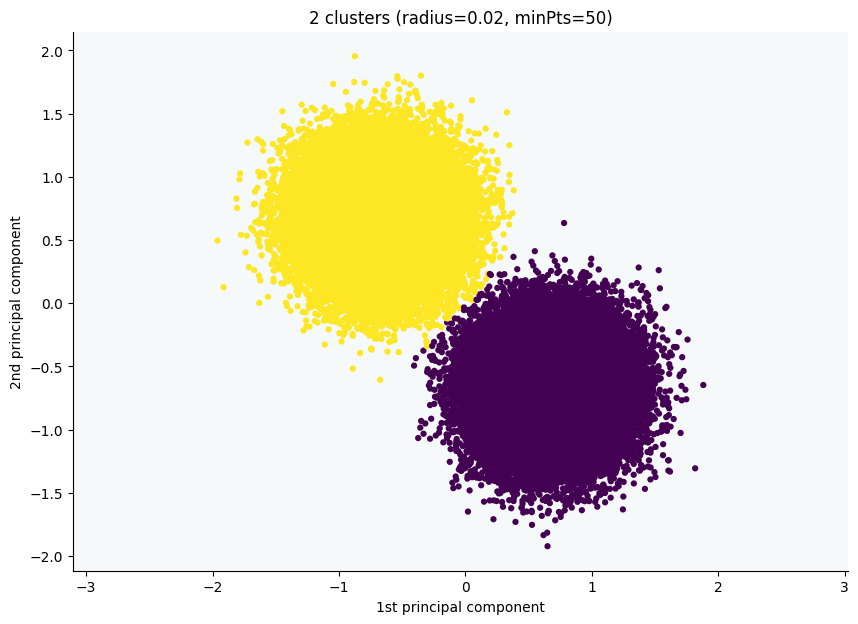

CLASSIX clustered 100000 data points with 2 features. 
The radius parameter was set to 0.02 and minPts was set to 50. 
As the provided data was auto-scaled by a factor of 1/5.24,
points within a radius R=0.02*5.24=0.10 were grouped together. 
In total, 5797989 distances were computed (58.0 per data point). 
This resulted in 7956 groups, each with a unique group center. 
These 7956 groups were subsequently merged into 2 clusters. 
For a visualisation of the clusters, use .explain(plot=True). 
In order to explain the clustering of individual data points, 
use .explain(ind1) or .explain(ind1, ind2) with data indices.


In [25]:
clx = CLASSIX(radius=0.02, minPts=50, verbose=0)
st = time()
clx.fit(X)
print("Runtime in seconds:", time()-st)
print("Adjusted Rand index:", ari(clx.labels_, y))
clx.explain(plot=True)


This looks very good. The adjusted Rand index confirms that we have succeeded in almost perfectly recovering the ground truth clusters:


## An experimental option

CLASSIX accepts an optional option called `mergeTinyGroups`. This parameter is `True` by default, resulting in the original CLASSIX method [1]. But when it is set to `False`, tiny groups with fewer than `minPts` points will be ignored in the merging phase and become stand-alone clusters first, before they are subsequently merged into a nearest bigger cluster. (That's different from the usual `minPts` criterion which applies to the size of clusters, not the size of individual groups.) This option can sometimes overcome 'creeping' between small groups, whereby clusters get merged simply because they are touched by low density groups. This allows us to cluster the tight Gaussian blobs using a much larger `radius` parameter. A larger `radius` parameter usually leads to faster clustering results, and so this can be the preferred option with tightly packed clusters.


Runtime in seconds: 0.31795263290405273
Adjusted Rand index: 0.998280722407054


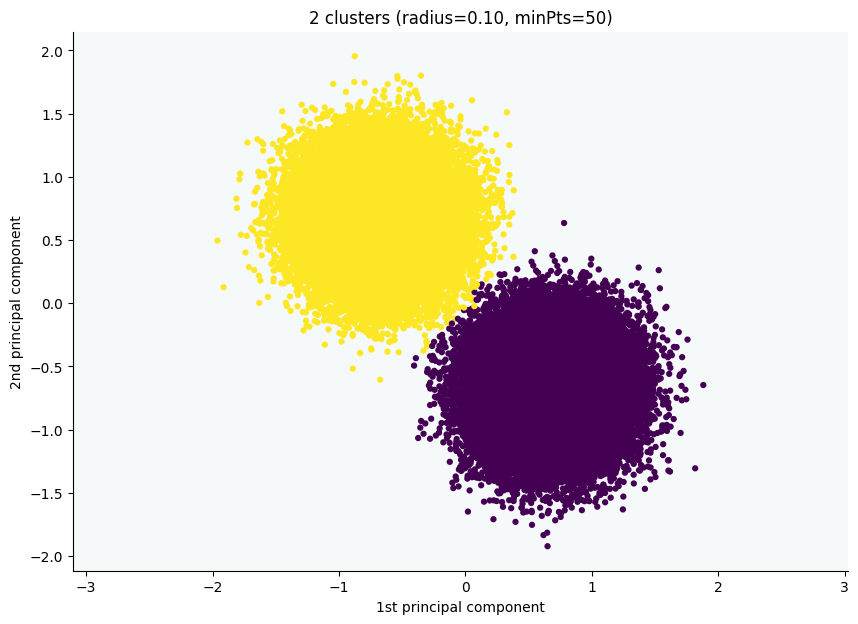

CLASSIX clustered 100000 data points with 2 features. 
The radius parameter was set to 0.10 and minPts was set to 50. 
As the provided data was auto-scaled by a factor of 1/5.24,
points within a radius R=0.10*5.24=0.52 were grouped together. 
In total, 1866180 distances were computed (18.7 per data point). 
This resulted in 616 groups, each with a unique group center. 
These 616 groups were subsequently merged into 2 clusters. 
For a visualisation of the clusters, use .explain(plot=True). 
In order to explain the clustering of individual data points, 
use .explain(ind1) or .explain(ind1, ind2) with data indices.


In [24]:
clx = CLASSIX(radius=0.1, minPts=50, mergeTinyGroups=False, verbose=0)
st = time()
clx.fit(X)
print("Runtime in seconds:", time()-st)
print("Adjusted Rand index:", ari(clx.labels_, y))
clx.explain(plot=True)

## References

[1] X. Chen and S. Güttel. "Fast and explainable clustering based on sorting." arXiv: [https://arxiv.org/abs/2202.01456](https://arxiv.org/abs/2202.01456), 2022.

